In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [3]:
# Reading crime csv file

#crime_hist = pd.read_excel('occupation.xlsx')
# Read multiple sheets
sheet_names = ['2011', '2021', 'change 2011-2021']  # List of sheet names
df_dict = pd.read_excel('occupation.xlsx', sheet_name=sheet_names)

# Access each DataFrame by sheet name
df_2011 = df_dict['2011']
df_2021 = df_dict['2021']
df_change = df_dict['change 2011-2021']


In [4]:
df_2011.rename(columns={'All usual residents aged 16-74 in employment':'Total Workforce'}, inplace=True)
df_2011.head(5)

,local authority code,local authority name,LSOA code,Total Workforce,"1. Managers, directors and senior officials",2. Professional occupations,3. Associate professional and technical occupations,4. Adminis-trative and secretarial occupations,5. Skilled trades occupations,"6. Caring, leisure and other service occupations",7. Sales and customer service occupations,"8. Process, plant and machine operatives",9. Elementary occupations
0,E09000001,City of London,E01000001,926,167,446,208,53,15,17,6,2,12
1,E09000001,City of London,E01000002,910,171,417,207,61,12,8,18,3,13
2,E09000001,City of London,E01000003,764,89,285,183,67,19,36,29,11,45
3,E09000001,City of London,E01000005,476,49,81,90,64,31,33,33,26,69
4,E09000001,City of London,E01032739,819,180,286,223,51,22,27,11,8,11


In [5]:
df_2011.isnull().sum()

local authority code                                   0
local authority name                                   0
LSOA code                                              0
Total Workforce                                        0
1. Managers, directors and senior officials            0
2. Professional occupations                            0
3. Associate professional and technical occupations    0
4. Adminis-trative and secretarial occupations         0
5. Skilled trades occupations                          0
6. Caring, leisure and other service occupations       0
7. Sales and customer service occupations              0
8. Process, plant and machine operatives               0
9. Elementary occupations                              0
dtype: int64

In [6]:
df_2021.rename(columns={'All usual residents aged 16 and over in employment':'Total Workforce'}, inplace=True)
df_2021.head(5)

,local authority code,local authority name,LSOA code,Total Workforce,"1. Managers, directors and senior officials",2. Professional occupations,3. Associate professional and technical occupations,4. Adminis-trative and secretarial occupations,5. Skilled trades occupations,"6. Caring, leisure and other service occupations",7. Sales and customer service occupations,"8. Process, plant and machine operatives",9. Elementary occupations
0,E09000001,City of London,E01000001,868,194,406,184,39,5,19,11,6,4
1,E09000001,City of London,E01000002,875,218,414,187,35,3,5,3,3,7
2,E09000001,City of London,E01000003,1002,191,388,217,72,28,27,26,11,42
3,E09000001,City of London,E01000005,494,52,129,61,43,21,52,34,16,86
4,E09000001,City of London,E01032739,1184,253,540,216,48,23,37,40,6,21


In [7]:
column_categories = {
    'White Collar': ['1. Managers, directors and senior officials', '2. Professional occupations', '3. Associate professional and technical occupations'],
    'Blue Collar': ['4. Adminis-trative and secretarial occupations', '5. Skilled trades occupations', '8. Process, plant and machine operatives'],
    'Elementary': ['6. Caring, leisure and other service occupations', '7. Sales and customer service occupations', '9. Elementary occupations']
}


In [8]:
# 2011 data aggreated in 3 groups, update the proportion of each group

df_2011['White Collar Sum'] = df_2011[column_categories['White Collar']].sum(axis=1)
df_2011['White Collar Prop'] = df_2011['White Collar Sum'] / df_2011['Total Workforce']

df_2011['Blue Collar Sum'] = df_2011[column_categories['Blue Collar']].sum(axis=1)
df_2011['Blue Collar Prop'] = df_2011['Blue Collar Sum'] / df_2011['Total Workforce']

df_2011['Elementary Sum'] = df_2011[column_categories['Elementary']].sum(axis=1)
df_2011['Elementary Prop'] = df_2011['Elementary Sum'] / df_2011['Total Workforce']

df_2011 = df_2011.iloc[:, np.r_[0:3, -6:0]]
df_2011.head(5)

,local authority code,local authority name,LSOA code,White Collar Sum,White Collar Prop,Blue Collar Sum,Blue Collar Prop,Elementary Sum,Elementary Prop
0,E09000001,City of London,E01000001,821,0.886609,70,0.075594,35,0.037797
1,E09000001,City of London,E01000002,795,0.873626,76,0.083516,39,0.042857
2,E09000001,City of London,E01000003,557,0.729058,97,0.126963,110,0.143979
3,E09000001,City of London,E01000005,220,0.462185,121,0.254202,135,0.283613
4,E09000001,City of London,E01032739,689,0.841270,81,0.098901,49,0.059829


In [9]:
# 2021 data aggreated in 3 groups, update the proportion of each group

df_2021['White Collar Sum'] = df_2021[column_categories['White Collar']].sum(axis=1)
df_2021['White Collar Prop'] = df_2021['White Collar Sum'] / df_2021['Total Workforce']

df_2021['Blue Collar Sum'] = df_2021[column_categories['Blue Collar']].sum(axis=1)
df_2021['Blue Collar Prop'] = df_2021['Blue Collar Sum'] / df_2021['Total Workforce']

df_2021['Elementary Sum'] = df_2021[column_categories['Elementary']].sum(axis=1)
df_2021['Elementary Prop'] = df_2021['Elementary Sum'] / df_2021['Total Workforce']

df_2021 = df_2021.iloc[:, np.r_[2, -6:0]]
df_2021.head(5)

,LSOA code,White Collar Sum,White Collar Prop,Blue Collar Sum,Blue Collar Prop,Elementary Sum,Elementary Prop
0,E01000001,784,0.903226,50,0.057604,34,0.039171
1,E01000002,819,0.936000,41,0.046857,15,0.017143
2,E01000003,796,0.794411,111,0.110778,95,0.094810
3,E01000005,242,0.489879,80,0.161943,172,0.348178
4,E01032739,1009,0.852196,77,0.065034,98,0.082770


In [10]:
# 2011 data left joined with 2021 by LSOA code

merged_df = pd.merge(df_2011, df_2021, on='LSOA code', suffixes = (' 2011', ' 2021'), how='left')
merged_df.rename(columns={'LSOA code': 'LSOA Code'}, inplace = True)
merged_df.head(5)

,local authority code,local authority name,LSOA Code,White Collar Sum 2011,White Collar Prop 2011,Blue Collar Sum 2011,Blue Collar Prop 2011,Elementary Sum 2011,Elementary Prop 2011,White Collar Sum 2021,White Collar Prop 2021,Blue Collar Sum 2021,Blue Collar Prop 2021,Elementary Sum 2021,Elementary Prop 2021
0,E09000001,City of London,E01000001,821,0.886609,70,0.075594,35,0.037797,784,0.903226,50,0.057604,34,0.039171
1,E09000001,City of London,E01000002,795,0.873626,76,0.083516,39,0.042857,819,0.936000,41,0.046857,15,0.017143
2,E09000001,City of London,E01000003,557,0.729058,97,0.126963,110,0.143979,796,0.794411,111,0.110778,95,0.094810
3,E09000001,City of London,E01000005,220,0.462185,121,0.254202,135,0.283613,242,0.489879,80,0.161943,172,0.348178
4,E09000001,City of London,E01032739,689,0.841270,81,0.098901,49,0.059829,1009,0.852196,77,0.065034,98,0.082770


In [11]:
# Some simple statistics for each group

print("The mean for each group: ")
print(merged_df.iloc[:,3:].mean())
print()
print("The standard deviation for each group: ")
print(merged_df.iloc[:,3:].std())
print()
print("The five numbers for each group: ")
print(merged_df.iloc[:,3:].quantile([0, 0.25, 0.5, 0.75, 1]))

The mean for each group: 
White Collar Sum 2011     403.153384
White Collar Prop 2011      0.487957
Blue Collar Sum 2011      197.894473
Blue Collar Prop 2011       0.253519
Elementary Sum 2011       199.692431
Elementary Prop 2011        0.258523
White Collar Sum 2021     485.943933
White Collar Prop 2021      0.550012
Blue Collar Sum 2021      183.773728
Blue Collar Prop 2021       0.213815
Elementary Sum 2021       203.400080
Elementary Prop 2021        0.236173
dtype: float64

The standard deviation for each group: 
White Collar Sum 2011     203.650777
White Collar Prop 2011      0.163922
Blue Collar Sum 2011       68.159236
Blue Collar Prop 2011       0.080192
Elementary Sum 2011        81.144250
Elementary Prop 2011        0.102680
White Collar Sum 2021     194.709248
White Collar Prop 2021      0.159419
Blue Collar Sum 2021       68.026368
Blue Collar Prop 2021       0.074444
Elementary Sum 2021        90.024265
Elementary Prop 2021        0.098754
dtype: float64

The five numbe

In [183]:
LSOA_Boundaries_2021 = gpd.read_file('OA_2021_EW_BFC_V8.shp')

In [188]:
LSOA_Boundaries_2021.head(5)
lsoa_2021 = LSOA_Boundaries_2021.rename(columns={'LSOA21CD':'LSOA Code'})

In [192]:
occupation = lsoa_2021.merge(merged_df, on = 'LSOA Code', how = 'outer')

occupation[occupation.isnull().any(axis=1)]

,OA21CD,LSOA Code,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry,...,Blue Collar Sum 2011,Blue Collar Prop 2011,Elementary Sum 2011,Elementary Prop 2011,White Collar Sum 2021,White Collar Prop 2021,Blue Collar Sum 2021,Blue Collar Prop 2021,Elementary Sum 2021,Elementary Prop 2021
0,E00000001,E01000001,City of London 001A,None,532250,181864,51.5202,-0.09523,09af0f57-ef7c-448b-b0ba-093649a86e70,"POLYGON ((532303.492 181814.110, 532301.242 18...",...,70.0,0.075594,35.0,0.037797,784.0,0.903226,50.0,0.057604,34.0,0.039171
1,E00000003,E01000001,City of London 001A,None,532171,181819,51.5198,-0.09638,be17a101-45e8-4e24-8f46-ecf5ae97ad13,"POLYGON ((532213.378 181846.192, 532213.954 18...",...,70.0,0.075594,35.0,0.037797,784.0,0.903226,50.0,0.057604,34.0,0.039171
2,E00000005,E01000001,City of London 001A,None,532166,181722,51.5190,-0.09649,cf9938e7-ce0a-4c09-9692-56d458696e28,"POLYGON ((532180.131 181763.020, 532177.000 18...",...,70.0,0.075594,35.0,0.037797,784.0,0.903226,50.0,0.057604,34.0,0.039171
3,E00000007,E01000001,City of London 001A,None,532088,181473,51.5167,-0.09771,297029c6-4f99-44c8-9392-ba6758ac99d5,"POLYGON ((532201.292 181668.180, 532205.000 18...",...,70.0,0.075594,35.0,0.037797,784.0,0.903226,50.0,0.057604,34.0,0.039171
4,E00166756,E01000001,City of London 001A,None,532084,181846,51.5201,-0.09762,e390d7bc-00cd-425f-b229-04b2505f8800,"POLYGON ((532104.872 182011.887, 532105.312 18...",...,70.0,0.075594,35.0,0.037797,784.0,0.903226,50.0,0.057604,34.0,0.039171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188875,W00010546,W01002022,Cardiff 040F,Caerdydd 040F,315206,176491,51.4810,-3.22246,43bebac3-bdb2-4e50-a268-d7e12b0bde85,"POLYGON ((315177.218 176595.969, 315178.628 17...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188876,W00010556,W01002022,Cardiff 040F,Caerdydd 040F,315031,176677,51.4826,-3.22503,36ee7d76-97a9-451b-8956-5218dc0aaf32,"POLYGON ((315150.952 176795.975, 315120.847 17...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188877,W00010600,W01002022,Cardiff 040F,Caerdydd 040F,315265,176606,51.4820,-3.22164,6387463d-9e15-4a57-a7f0-c0f91c169e3d,"POLYGON ((315159.000 176793.000, 315162.592 17...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188878,W00010612,W01002022,Cardiff 040F,Caerdydd 040F,315467,176365,51.4799,-3.21868,0d5f26f9-d7d6-4909-96f3-da20c7af9d38,"POLYGON ((315713.319 176476.777, 315710.000 17...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

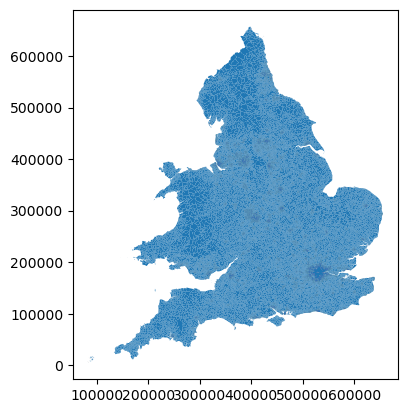

In [191]:
occupation.plot()